
# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will analyze a dataset of Medical Appointment No Shows and answer some questions
The data contains data for 110,000 medical appointments and 14 associated variables, the most important of which are whether or not a patient comes to an appointment
The questions I will answer

- What is the most important thing that makes the patient come to his appointment?

-  Do SMS reminders affect the proportion of patients show ?

- Does age affect the attendance of the patient? What is the highest ages?

In [151]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sp

%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> In data wrangling ,the dataset will be loaded , checked for cleanliness, and then will be trimmed and cleaned up.

### General Properties

In [152]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [153]:
# show the number of columns and rows.
df.shape

(110527, 14)

110527 rows

14  columns

In [154]:
#show the rough value distribution of each column.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [155]:
#Getting an overview over the colums types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [156]:
#checking missing data
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [157]:
df.duplicated().sum()

0

 some of observations 
 
 - patient id should be int ، not float .
 - there is no misiing data and no duplicate data .
 - thers is negative age in the data ، will therefore be inspected .
 - ScheduledDay and AppointmentDay should be datetime datatype .

### Data Cleaning 

In [158]:
# convert data type.
df['PatientId']= df.PatientId.astype(int)
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [159]:
# drop columns we don't need it.
df.drop(['PatientId' , 'AppointmentID' , 'Neighbourhood'] , axis=1 ,inplace=True)
df.shape

(110527, 11)

In [160]:
df.rename(columns ={'Hipertension':'Hypertension' , 'Handcap':'Handicap','No-show':'No_show'} , inplace=True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_show'],
      dtype='object')

In [161]:
# convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby.
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
#Processing of age data that is negative.
df.loc[df['Age']== -1]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,0,0,0,0,0,0,0


In [163]:
df.drop([99832], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6691d48588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f66919ea128>]], dtype=object)

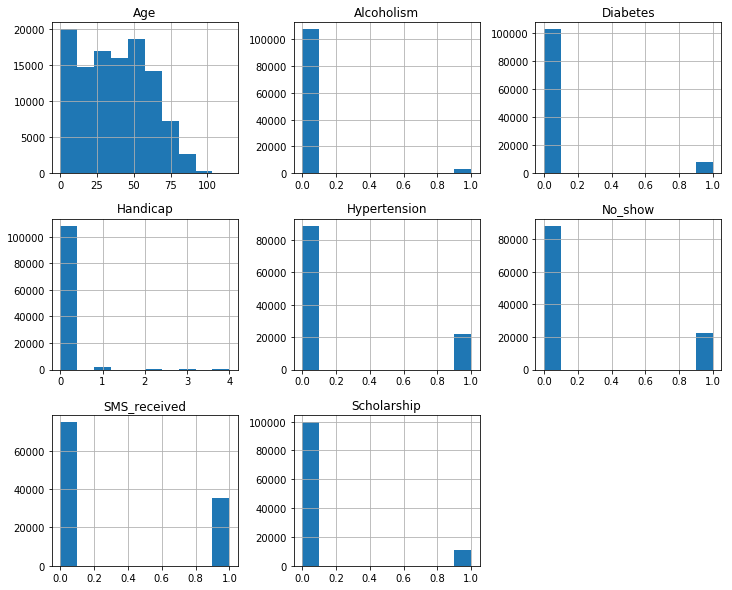

In [164]:
df.hist(figsize=(12,10))

In [165]:
# create a mask for people who showed
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,0,True,False
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0,True,False
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,0,True,False
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,0,True,False
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,0,True,False


In [166]:
df[showed].count()

Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Scholarship       88207
Hypertension      88207
Diabetes          88207
Alcoholism        88207
Handicap          88207
SMS_received      88207
No_show           88207
showed            88207
not_showed        88207
dtype: int64

In [167]:
df[not_showed].count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handicap          22319
SMS_received      22319
No_show           22319
showed            22319
not_showed        22319
dtype: int64

Text(0.5,1,'Paitents Show Status')

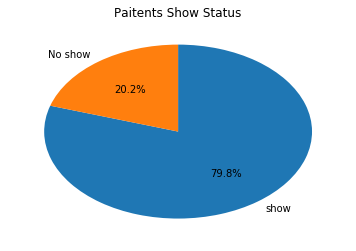

In [168]:
# plot a pie chart.
#Calculate the percentage of patients who show and not show to see the difference
sorted_counts = df.No_show.value_counts()
plt.pie(sorted_counts , labels=['show','No show'] , startangle=90 ,counterclock=False , autopct='%1.1f%%' )
plt.axis=('square')
plt.title('Paitents Show Status')

There is a big and clear difference for the patients who show , and this is a good indicator. We will explore what is the reason for the increase in their attendance .

## Research Question 1 -What is the most important thing that makes the patient come to his appointment? 

In [169]:
#To make it easier to compare different columns, we will set up a main function to easily change it later

def plothist(columnName , xlabel , ylabel , title ):
    plt.figure(figsize = [10,8])
    df[columnName].hist(alpha=0.5,label='show')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

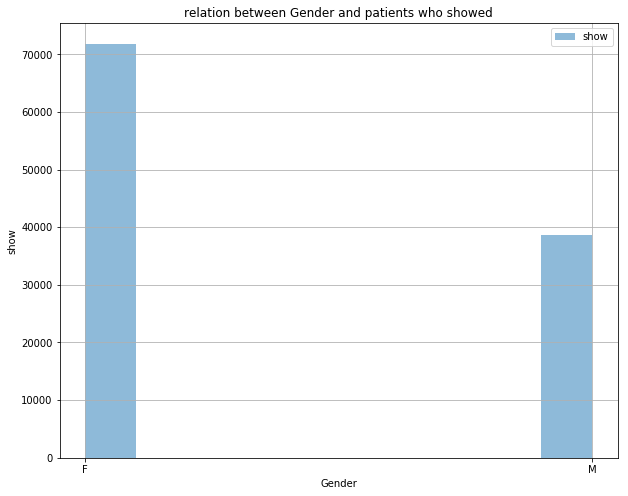

In [170]:
#We call the function and change the parameter for the gender column
plothist( 'Gender'  , 'Gender'  ,'show' , 'relation between Gender and patients who showed')

We note that the gender of a woman is twice the showed of a man

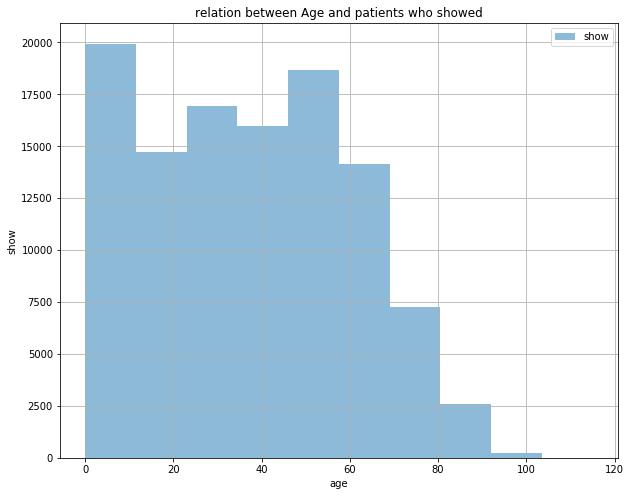

In [171]:
#We call the function and change the parameter for the age column
plothist( 'Age'  , 'age'  ,'show' , 'relation between Age and patients who showed')

In [172]:
df.Age[showed].mean()

37.790504154999034

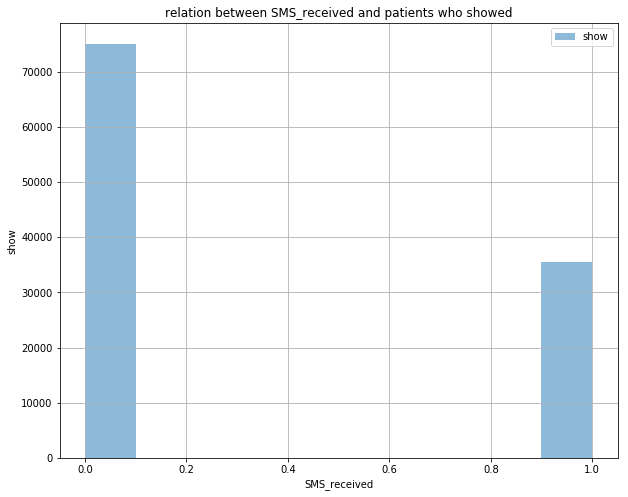

In [173]:
#We call the function and change the parameter for the SMS_received column
plothist( 'SMS_received'  , 'SMS_received'  ,'show' , 'relation between SMS_received and patients who showed')

It seems to us that the number of people who do not receive SMS and show to be greater than those who receive SMS

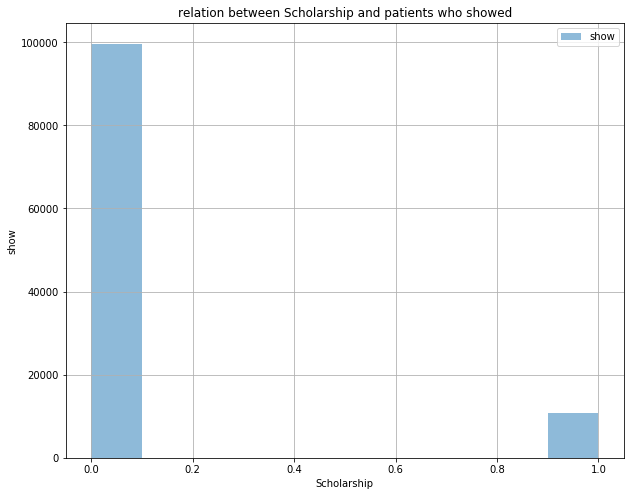

In [174]:
#We call the function and change the parameter for the Scholarship column
plothist( 'Scholarship'  , 'Scholarship'  ,'show' , 'relation between Scholarship and patients who showed')

The number of those who have a scholarship and show up is very small compared to those who don't have a scholarship

 - In looking at SMS, scholarship, age and gender, age is the biggest factor affecting who will show .

### Research Question 2 - Do SMS reminders affect the proportion of patients show ?

Text(0,0.5,'PatientId')

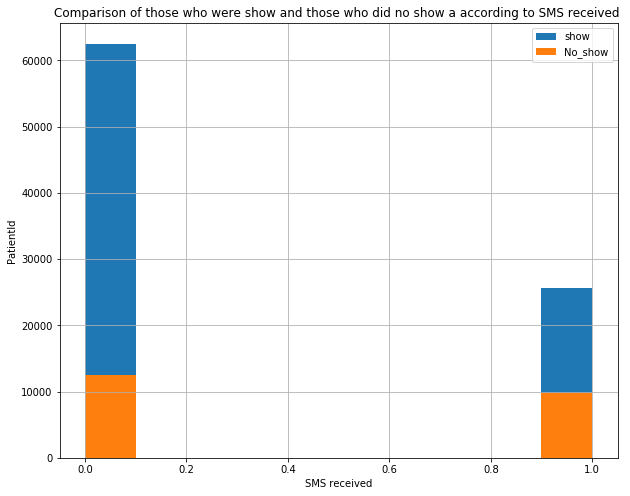

In [180]:
#Comparing the number of patients who showed up and didn't show with their response to sms messages
# to find out the extent of its impact on the patient's attendance

# plot a bar chart.
plt.figure(figsize = [10,8])
df.SMS_received[showed].hist(alpha=1 , label='show')
df.SMS_received[not_showed].hist(alpha=1 , label='No_show')
plt.legend()
plt.title('Comparison of those who were show and those who did no show a according to SMS received ')
plt.xlabel('SMS received')
plt.ylabel('PatientId')

We note that the number of patients who didn't receive sms messages is much greater than those who received, however, those who didn't receive messages show more .

Text(0,0.5,'SMS_Not_received')

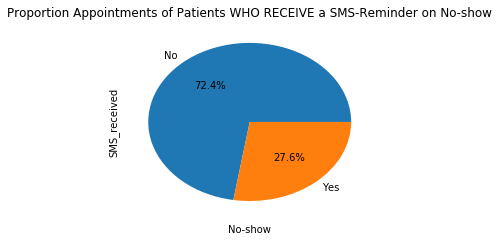

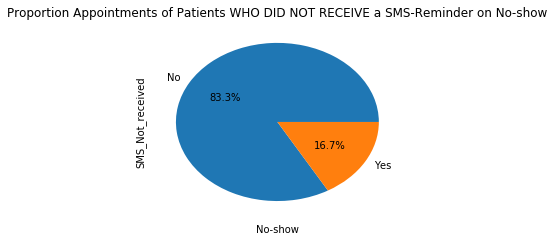

In [176]:
# Styling the graphs
#Patients WHO RECEIVE a SMS-Reminder on No-show
fig = plt.figure(figsize=(10,8))

sms =df[(df.SMS_received == 1 )].No_show.value_counts()
plt.subplot(2,2,1)
sms.plot.pie( labels = ['No', 'Yes'],autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO RECEIVE a SMS-Reminder on No-show')
plt.xlabel('No-show');
plt.ylabel('SMS_received')


# Patients who NOT RECEIVE a SMS-Reminder on No-show
fig = plt.figure(figsize=(10,8))
sms =df[(df.SMS_received == 0 )].No_show.value_counts()
plt.subplot(2,2,2)
sms.plot.pie( labels = ['No', 'Yes'],autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO DID NOT RECEIVE a SMS-Reminder on No-show')
plt.xlabel('No-show');
plt.ylabel('SMS_Not_received')

Surprisingly , the group who received a sms-reminder didn't show up more often compared to those who did not receive a reminder. 

### Research Question 3 - Does age affect the attendance of the patient? What is the highest ages?


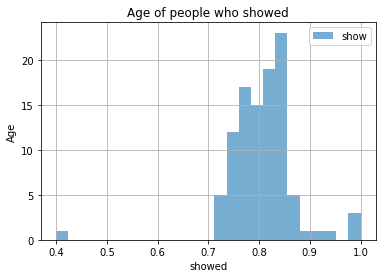

In [177]:
# We want to know the average ages, to know the most show up mean ages .
df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()

It seems that the average age of the most attended is more than 15 years . 

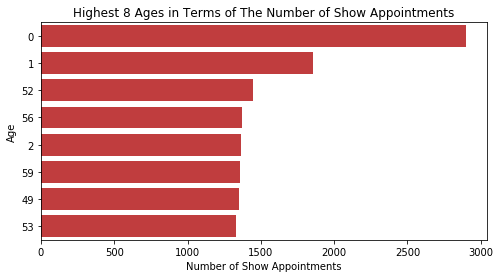

In [178]:
# no show appointments.
df_show = df[df.No_show == 0]

# plot a horizontal bar chart
plt.figure(figsize = [8, 4])
orders = df_show['Age'].value_counts().index[:8]
base_color = sp.color_palette()[3]
sp.countplot(data = df_show, y = 'Age', color = base_color, order = orders)
plt.title('Highest 8 Ages in Terms of The Number of Show Appointments')
plt.xlabel('Number of Show Appointments')
plt.ylabel('Age');

Most of the patients show up are less than two years old and more than 50 years old

<a id='conclusions'></a>
## Conclusions

 

- for Q1 : In the comparison before this question it appears that those who show more than those who don't show much, so we want to know the most factors that help the appearance of the patient and we care about them. In the first comparison, it turns out that the gender of women is more present than men, and this indicates that women are more interested in attending appointments. In the second graph, the average age of those who appear is 37.7 years , In looking at  SMS, scholarship, age and gender, age is the biggest factor affecting who will show .


- for Q2 : We note that the number of people who received the sms message is much less than those who didn't receive it, while those who always show are more than those who don't showed , as it appears in the pie Chart, comparing the number of those who did not receive sms messages and attended is more than those who received sms messages and attended, and this indicates that sms messages don't have a significant impact on the patient's attendance . 


- for Q3 : We tried to find out the relationship between age and patient attendance, and it became clear to us that children less than two years old and adults over 50 years old are the patients who attend their appointments the most  , As shown in the chart , the largest number of attende appointments are for months-olds, followed by one year olds.


## Limitations

 - The scope of this analysis is limited to the setting in which the data has been gathered. Any findings or trends cannot be induced to a larger population or to another setting , covering more than one country would've been better.

- The dataset covers a short period only, longer period could lead to a better results , recent data would be much better .


- The data set includes mistakes data like age with negtive value and appointment day before scheduled day.





In [179]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0